In [1]:
import numpy as np
import pandas as pd
import IPython
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import sys
sys.path.append("../src/helpers")
from WER import wer_score

import matplotlib.pyplot as plt
%matplotlib inline

### Calculating WER for test audio files

In [2]:
df = pd.read_csv("../data/processed/metrics/mozilla_deepspeech_eval.csv")

In [3]:
wers = []
for _, row in tqdm(df.iterrows()):
    if not pd.isnull(row["transcript"]):
        wers.append(wer_score(row["transcript"], row["phrase"]))
    else:
        wers.append(np.nan)
df["wer"] = wers

## Mean WER

In [4]:
print("mean dataset WER:", df["wer"].mean())

mean dataset WER: 0.4693388069956225


### Speakers accents

In [5]:
df_speakers = df.groupby("speaker_id", as_index=False)["wer"].mean().sort_values("wer")
df_speakers["idx"] = [x for x in range(len(df_speakers))]

Text(0.5, 1.0, 'mean WER for each speaker')

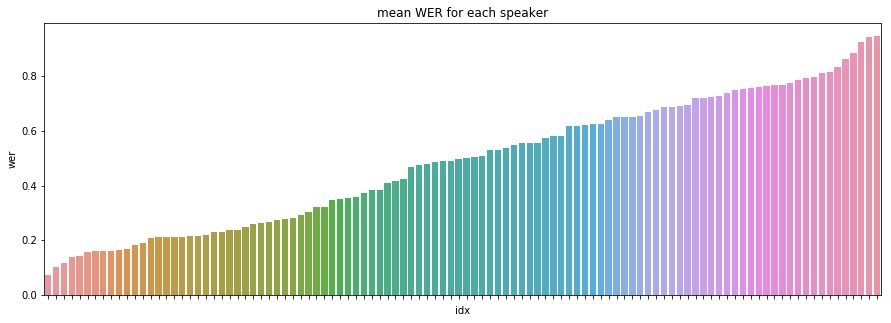

In [6]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="idx", y="wer", data=df_speakers)
ax.set_xticklabels([])
plt.title("mean WER for each speaker")

In [7]:
best_3 = df_speakers["speaker_id"].iloc[:3].values
worst_3 = df_speakers["speaker_id"].iloc[-3:].values

In [8]:
df[df["speaker_id"]==best_3[0]]["file_name"].head(2)

532     1249120_18386513_93250733.wav
698    1249120_18386513_101350002.wav
Name: file_name, dtype: object

#### More clear speakers

In [9]:
IPython.display.Audio("../data/processed/test/1249120_18386513_93250733.wav")

In [10]:
IPython.display.Audio("../data/processed/test/1249120_18386513_101350002.wav")

In [11]:
IPython.display.Audio("../data/processed/test/" + df[df["speaker_id"]==best_3[1]]["file_name"].iloc[0])

In [12]:
IPython.display.Audio("../data/processed/test/" + df[df["speaker_id"]==best_3[2]]["file_name"].iloc[0])

#### Least clear speakers

In [13]:
IPython.display.Audio("../data/processed/test/" + df[df["speaker_id"]==worst_3[0]]["file_name"].iloc[10])

In [14]:
IPython.display.Audio("../data/processed/test/" + df[df["speaker_id"]==worst_3[1]]["file_name"].iloc[3])

In [15]:
IPython.display.Audio("../data/processed/test/" + df[df["speaker_id"]==worst_3[2]]["file_name"].iloc[0])

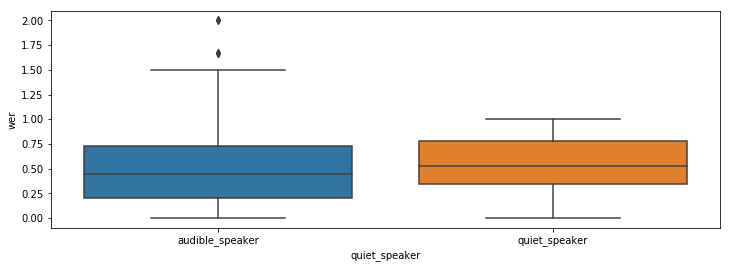

In [16]:
plt.figure(figsize=(12,4))
ax = sns.boxplot(x="quiet_speaker", y="wer", data=df)

### Impact of noisy environment

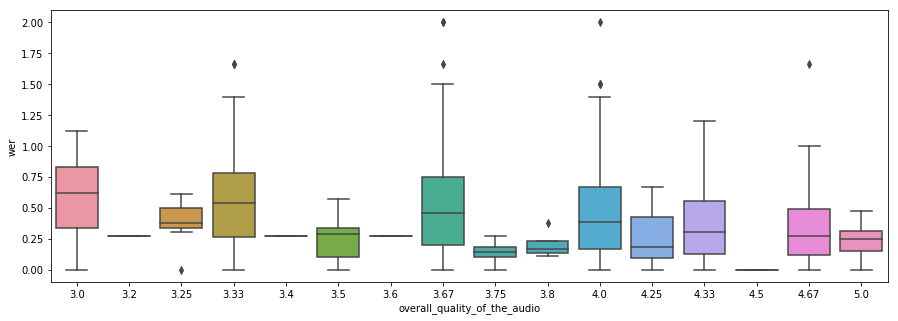

In [17]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(x="overall_quality_of_the_audio", y="wer", data=df)

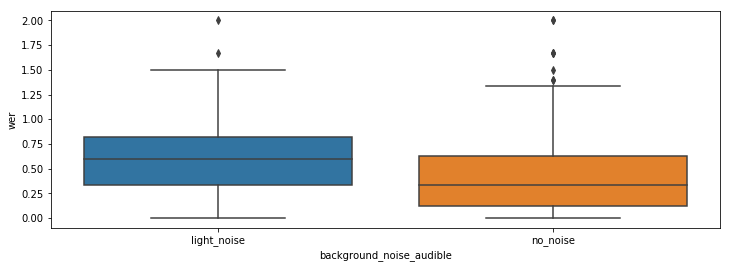

In [18]:
plt.figure(figsize=(12,4))
ax = sns.boxplot(x="background_noise_audible", y="wer", data=df)

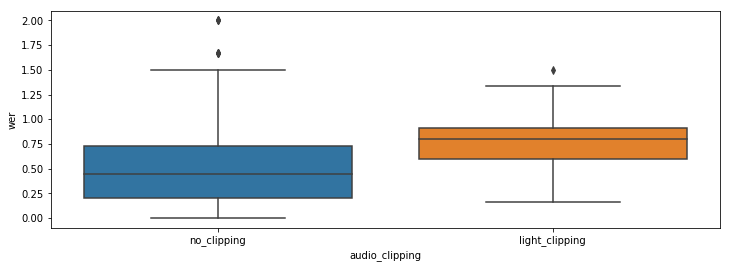

In [19]:
plt.figure(figsize=(12,4))
ax = sns.boxplot(x="audio_clipping", y="wer", data=df)

In [30]:
df_length = df.groupby("audio length", as_index=False)["wer"].mean().sort_values("audio length")
df_length["audio length"] = [np.round(x) for x in df_length["audio length"]]

In [31]:
df_length.describe()

,audio length,wer
count,331.000000,331.000000
mean,6.238671,0.487975
std,3.535167,0.208275
min,1.000000,0.000000
25%,3.000000,0.383723
50%,6.000000,0.473589
75%,9.000000,0.572947
max,17.000000,2.000000


Text(0.5, 1.0, 'mean WER by lenght of audio clip')

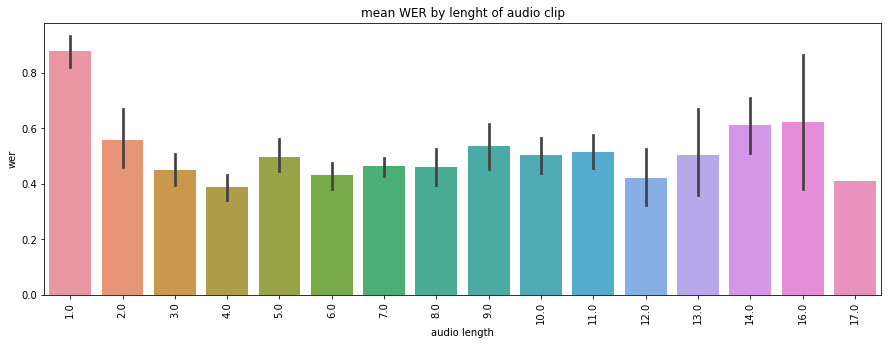

In [33]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="audio length", y="wer", data=df_length)
plt.xticks(rotation=90)
plt.title("mean WER by lenght of audio clip")

In [34]:
df[df["audio length"]>16]

,transcript,file_name,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,phrase,prompt,writer_id,audio length,wer
2600,i got to my hand a couple of days ago and all ...,1249120_42783052_51260430.wav,no_clipping,1.0,no_noise,0.6653,3.67,audible_speaker,1.0,42783052,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,I cut my hand a couple of days ago and althoug...,Open wound,19638651,16.981375,0.409091
4030,my mind feels very sad as if he tart the way i...,1249120_41956733_45266621.wav,no_clipping,1.0,no_noise,0.6939,4.33,audible_speaker,1.0,41956733,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,"My mind feels very sad, as if it hurts. The w...",Emotional pain,11106820,16.469375,0.379310


In [35]:
IPython.display.Audio("../data/processed/test/1249120_42783052_51260430.wav")

In [36]:
IPython.display.Audio("../data/processed/test/1249120_41956733_45266621.wav")

In [43]:
df[df["speaker_id"]==best_3[0]].sort_values("audio length").iloc[-1][["transcript","wer"]]

transcript    i cut my hand a couple of days ago and althoug...
wer                                                           0
Name: 2187, dtype: object

In [41]:
IPython.display.Audio("../data/processed/test/1249120_18386513_81960877.wav")